1.⁠ ⁠Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

<ipython-input-1-31c3f220b616>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


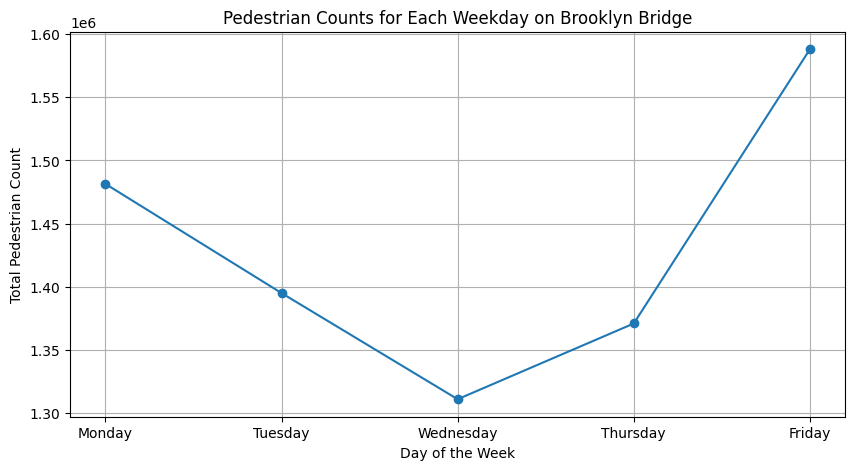

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

# Convert 'hour_beginning' column to datetime format
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

# Extract day of the week
df['DayOfWeek'] = df['hour_beginning'].dt.day_name()

# Filter data for weekdays (Monday to Friday)
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
df_weekdays = df[df['DayOfWeek'].isin(weekdays)]

# Group by day of the week and sum pedestrian counts
df_weekly_counts = df_weekdays.groupby('DayOfWeek').sum(numeric_only=True)

# Reorder index to maintain correct weekday order
df_weekly_counts = df_weekly_counts.reindex(weekdays)

# Plot the pedestrian counts
plt.figure(figsize=(10, 5))
plt.plot(df_weekly_counts.index, df_weekly_counts['Pedestrians'], marker='o', linestyle='-')
plt.xlabel("Day of the Week")
plt.ylabel("Total Pedestrian Count")
plt.title("Pedestrian Counts for Each Weekday on Brooklyn Bridge")
plt.grid(True)
plt.show()

2.⁠ ⁠Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

<ipython-input-2-db4f44618f2e>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


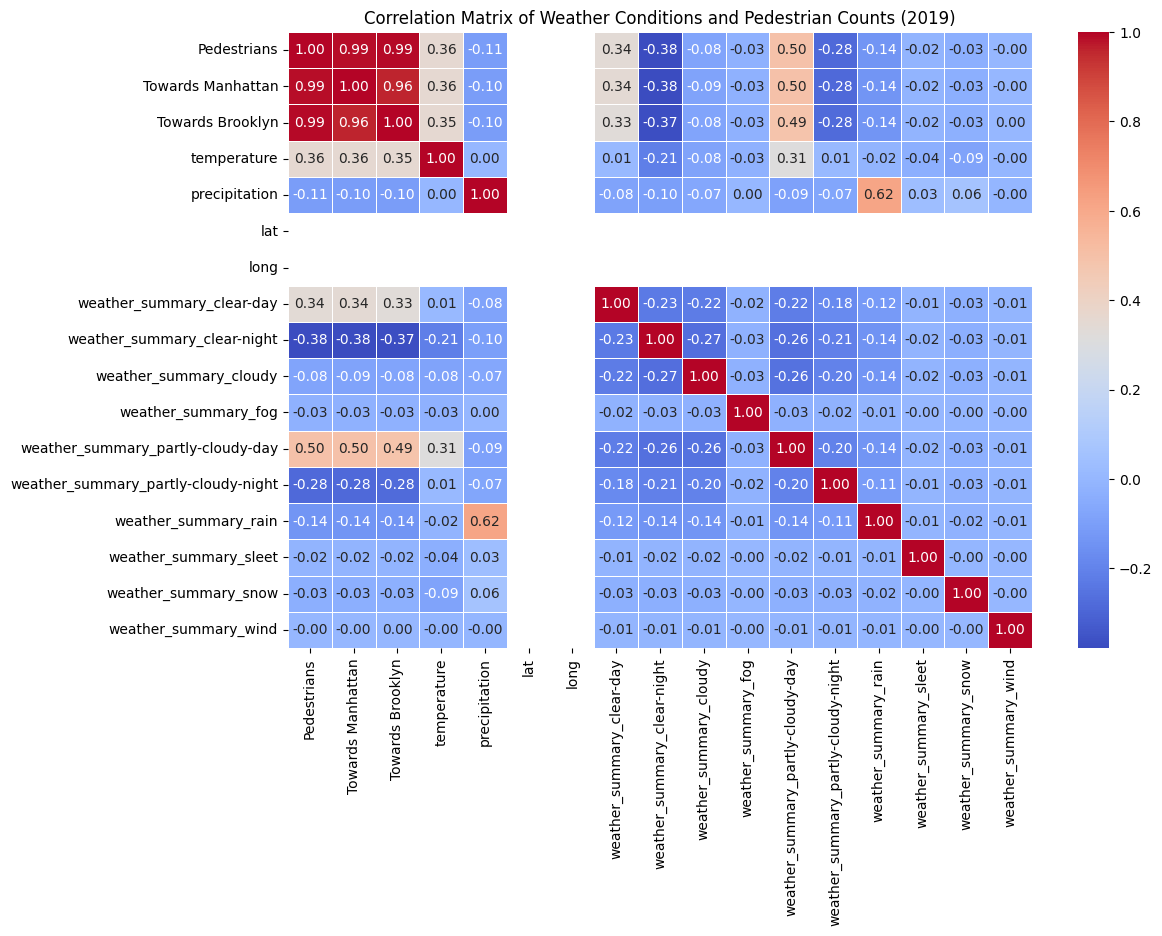

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

# Convert 'hour_beginning' column to datetime format
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

# Filter data for the year 2019
df_2019 = df[df['hour_beginning'].dt.year == 2019]

# Drop rows with missing weather summaries
df_2019 = df_2019.dropna(subset=['weather_summary'])

# Apply one-hot encoding to the 'weather_summary' column
df_2019_encoded = pd.get_dummies(df_2019, columns=['weather_summary'])

# Compute the correlation matrix
correlation_matrix = df_2019_encoded.corr(numeric_only=True)

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Weather Conditions and Pedestrian Counts (2019)")
plt.show()

3.⁠ ⁠Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

<ipython-input-4-eb87a3d9179f>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


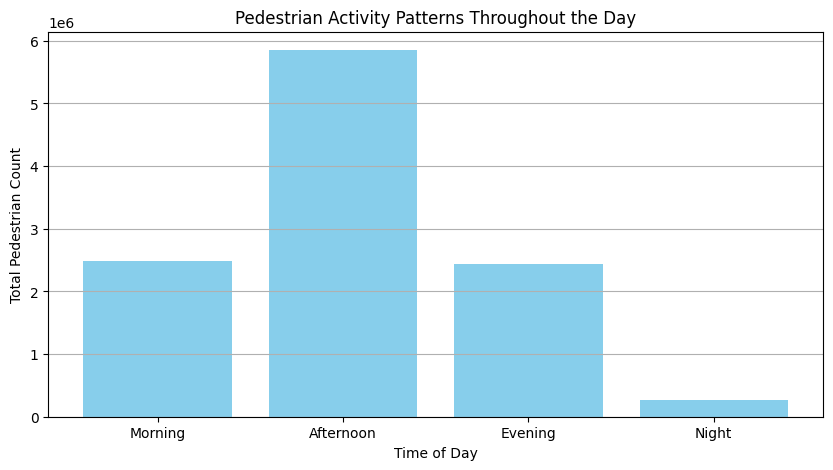

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)


# Convert 'hour_beginning' column to datetime format
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

# Define a function to categorize time of day
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

# Apply the function to categorize each row's time
df['TimeOfDay'] = df['hour_beginning'].dt.hour.apply(categorize_time_of_day)

# Group by time of day and sum pedestrian counts
df_time_activity = df.groupby('TimeOfDay').sum(numeric_only=True)

# Define the order of time categories for proper visualization
time_order = ["Morning", "Afternoon", "Evening", "Night"]
df_time_activity = df_time_activity.reindex(time_order)

# Plot pedestrian activity by time of day
plt.figure(figsize=(10, 5))
plt.bar(df_time_activity.index, df_time_activity['Pedestrians'], color='skyblue')
plt.xlabel("Time of Day")
plt.ylabel("Total Pedestrian Count")
plt.title("Pedestrian Activity Patterns Throughout the Day")
plt.grid(axis='y')
plt.show()